In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [22]:
folder = '../../results/'

figs = os.path.join(folder, 'figs')
file = os.path.join(folder, 'raw-results.csv')

df = pd.read_csv(file)

sns.set_context("paper", font_scale=2.8)   

In [23]:
df = df[df['Experiment'] == 'FINA']
df['Clazz'] = df['Class']

df = df.replace('fixed_full', 'Fixed')
df = df.replace('original', 'Original')

<Figure size 432x288 with 0 Axes>

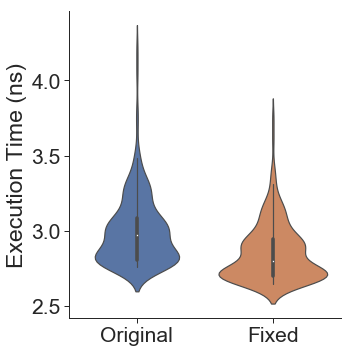

In [18]:
%matplotlib inline
plt.clf()

sns.set_style("ticks")

import math

bench = df.query('Class=="MathOperationsBenchmark" and Method=="nextIndexNoConditionals"')
bench = bench.replace('fixed_full', 'fixed')
#bench = bench[bench['Method'] == 'baseline']

# Execution time -> Throughput
bench['Score Norm'] = 1e9 / bench['Score']

#headers_table = pd.pivot_table(data=headers_bench, values='Score', index=['Version','Method', 'Iteration', 'Fork', 'Trial'])
cat = sns.catplot(data=bench, x='Version', y='Score Norm', 
                  ci=95, kind='violin', sharey=False, legend_out=False, legend=True, aspect=1)
cat.set_axis_labels("", "Execution Time (ns)")

#@cat.set_xticklabels(['i' + str(i) for i in list(range(1,21))])
#cat.set_title("{col_name}")

#plt.legend(bbox_to_anchor=(-2.3, .95), loc=2, borderaxespad=0.)

#plt.show()
#plt.xticks(fontsize=24)
plt.tight_layout()
plt.savefig(os.path.join(figs, 'netty-mathoperationsbenchmark.pdf'))



C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 432x288 with 0 Axes>

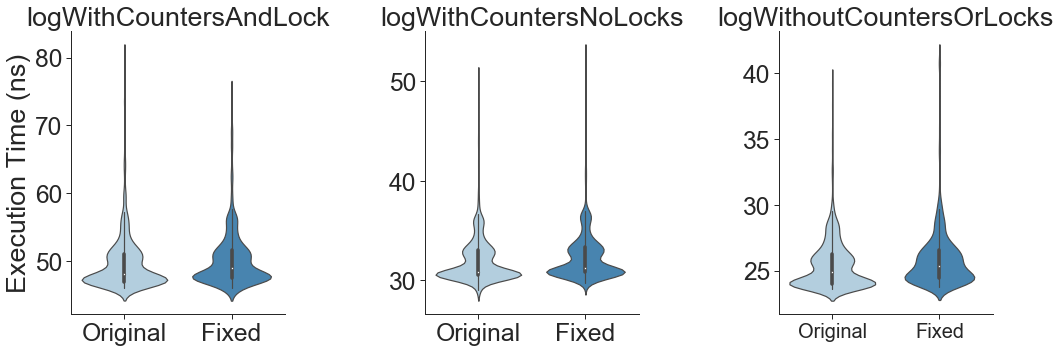

In [24]:
%matplotlib inline
plt.clf()

sns.set_style("ticks")

import math

methods = ['logWithCountersAndLock',
            'logWithCountersNoLocks',
           # 'logWithCountersRetryAfterReconfig',
            'logWithoutCountersOrLocks',
          ]

bench = df.query('Class == "LoggerConfigBenchmark" and Method == @methods')
#bench = bench[bench['Method'] == 'baseline']

# Execution time -> Throughput
bench['Score Norm'] = 1e9 / bench['Score']

#headers_table = pd.pivot_table(data=headers_bench, values='Score', index=['Version','Method', 'Iteration', 'Fork', 'Trial'])
cat = sns.catplot(data=bench, x='Version', y='Score Norm', col="Method",
                  ci=95, kind='violin', sharey=False, legend_out=False, legend=True, aspect=1, palette="Blues")
cat.set_axis_labels("", "Execution Time (ns)")
cat.set_titles("{col_name}")

#@cat.set_xticklabels(['i' + str(i) for i in list(range(1,21))])
#cat.set_title("{col_name}")

#plt.legend(bbox_to_anchor=(-2.3, .95), loc=2, borderaxespad=0.)

#plt.show()
plt.xticks(fontsize=20)
plt.tight_layout()
plt.savefig(os.path.join(figs, 'log4j-loggerconfigbenchmark.pdf'))